#### 计算均匀球体中的走时场

此时的走时就是距离除速度（简单起见，设置速度为1），而距离有理论公式

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rarr = np.arange(0, 70, 0.2)
tarr = np.deg2rad(np.arange(0, 180, 0.2))
parr = np.deg2rad(np.array([0.0]))



# 慢度场
slw  = np.ones((len(rarr), len(tarr), len(parr)), dtype='f')

srcloc = [45, np.deg2rad(10.0), np.deg2rad(0.0)]

FMMTT = pyfmm.travel_time_source(
    srcloc,
    rarr, tarr, parr, slw, 2, sphcoord=True)
# Fast Sweeping 
FSMTT = pyfmm.travel_time_source(
    srcloc,
    rarr, tarr, parr, slw, 2, sphcoord=True, useFSM=True, FSMparallel=True)

# 真实解
rr, tt, pp = srcloc
xx = rr*np.sin(tt)*np.cos(pp)
yy = rr*np.sin(tt)*np.sin(pp)
zz = rr*np.cos(tt)
XX = rarr[:,None,None] * np.sin(tarr[None,:,None]) * np.cos(parr[None,None,:])
YY = rarr[:,None,None] * np.sin(tarr[None,:,None]) * np.sin(parr[None,None,:])
ZZ = rarr[:,None,None] * np.cos(tarr[None,:,None]) 
real_TT = np.sqrt((XX-xx)**2 + (YY-yy)**2 + (ZZ-zz)**2)


WARNING! For parallel FSM, maxLoops must set at least 2 (already changed).


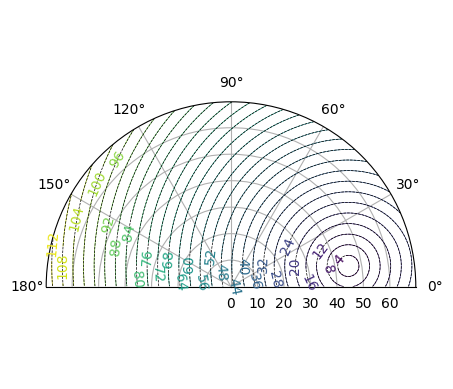

In [3]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
cs = ax.contour(tarr, rarr, FMMTT[:, :, 0], levels=30, linewidths=0.5)
ax.clabel(cs)
_  = ax.contour(tarr, rarr, real_TT[:, :, 0], levels=30, linewidths=0.5, colors='k', linestyles='--')
ax.set_thetalim([0, np.pi])
ax.set_rorigin(0.0)


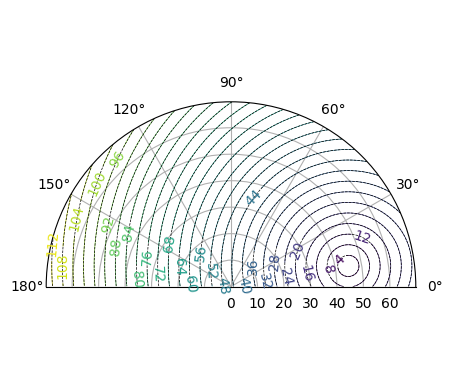

In [4]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
cs = ax.contour(tarr, rarr, FSMTT[:, :, 0], levels=30, linewidths=0.5)
ax.clabel(cs)
_  = ax.contour(tarr, rarr, real_TT[:, :, 0], levels=30, linewidths=0.5, colors='k', linestyles='--')
ax.set_thetalim([0, np.pi])
ax.set_rorigin(0.0)

In [5]:
# 误差 
FMM_error = np.mean(np.abs(FMMTT - real_TT))
FSM_error = np.mean(np.abs(FSMTT - real_TT))
print("FMM_error = ", FMM_error)
print("FSM_error = ", FSM_error)

FMM_error =  0.028280015483542597
FSM_error =  0.028309938660508724
